In [52]:
from matplotlib.pyplot import subplots
from pandas import read_csv, cut, concat
from seaborn import set_style, barplot

In [2]:
set_style('darkgrid')

In [3]:
column_types = {
    'fraDPALevel': str,
    'spaTest': str,
    'spaTestStatus': str,
    'spaBall100': str,
    'spaDPALevel': str,
    'spaPTName': str,
    'spaPTRegName': str,
    'spaPTAreaName': str,
    'spaPTTerName': str
}

In [4]:
column_renamings = {'HistLang': 'histLang'}

In [5]:
ife = (
    read_csv('data/Odata2019File.csv', sep=';', encoding='windows-1251', dtype=column_types)
    .rename(columns=column_renamings)
)

In [6]:
ife.info(verbose=True, show_counts=True, memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353813 entries, 0 to 353812
Data columns (total 126 columns):
 #    Column            Non-Null Count   Dtype  
---   ------            --------------   -----  
 0    OUTID             353813 non-null  object 
 1    Birth             353813 non-null  int64  
 2    SEXTYPENAME       353813 non-null  object 
 3    REGNAME           353813 non-null  object 
 4    AREANAME          353813 non-null  object 
 5    TERNAME           353813 non-null  object 
 6    REGTYPENAME       353813 non-null  object 
 7    TerTypeName       353813 non-null  object 
 8    ClassProfileNAME  319688 non-null  object 
 9    ClassLangName     319688 non-null  object 
 10   EONAME            319688 non-null  object 
 11   EOTYPENAME        319688 non-null  object 
 12   EORegName         319688 non-null  object 
 13   EOAreaName        319688 non-null  object 
 14   EOTerName         319688 non-null  object 
 15   EOParent          319688 non-null  object 
 16   

In [8]:
ife.shape

(353813, 126)

In [9]:
ife['OUTID'].nunique()

353813

In [10]:
participants = ife[ife.columns[:16]].fillna('').set_index('OUTID')

In [11]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353813 entries, 07ad4c55-70ef-442d-bb7f-34c95c0e6ee4 to ae187ba1-7897-4855-8e01-f6fb4db2222b
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Birth             353813 non-null  int64 
 1   SEXTYPENAME       353813 non-null  object
 2   REGNAME           353813 non-null  object
 3   AREANAME          353813 non-null  object
 4   TERNAME           353813 non-null  object
 5   REGTYPENAME       353813 non-null  object
 6   TerTypeName       353813 non-null  object
 7   ClassProfileNAME  353813 non-null  object
 8   ClassLangName     353813 non-null  object
 9   EONAME            353813 non-null  object
 10  EOTYPENAME        353813 non-null  object
 11  EORegName         353813 non-null  object
 12  EOAreaName        353813 non-null  object
 13  EOTerName         353813 non-null  object
 14  EOParent          353813 non-null  object
dtypes: int64(1), object(14)
m

In [12]:
participants.head()

,Birth,SEXTYPENAME,REGNAME,AREANAME,TERNAME,REGTYPENAME,TerTypeName,ClassProfileNAME,ClassLangName,EONAME,EOTYPENAME,EORegName,EOAreaName,EOTerName,EOParent
OUTID,,,,,,,,,,,,,,,
07ad4c55-70ef-442d-bb7f-34c95c0e6ee4,2001,жіноча,Запорізька область,Василівський район,м.Василівка,Студент закладу вищої освіти,місто,Молодший спеціаліст,українська,"Відокремлений структурний підрозділ ""Василівсь...",заклад вищої освіти,Запорізька область,Василівський район,м.Василівка,Департамент освіти і науки Запорізької облдерж...
8626c448-3a7d-434f-b01a-c2530ccf3a4f,1985,жіноча,Донецька область,Донецька область,м.Торецьк,Учень (слухач) закладу професійної (професійно...,місто,Кваліфікований робітник,українська,Торецький професійний ліцей,професійний ліцей відповідного профілю,Донецька область,м.Торецьк,м.Торецьк,Департамент освіти і науки Донецької обласної ...
9709b00b-144c-4487-b7bc-66c0b353b324,2001,жіноча,Тернопільська область,Тернопільська область,м.Тернопіль,Студент закладу вищої освіти,місто,Молодший спеціаліст,українська,"Приватний вищий навчальний заклад ""Медичний ко...",заклад вищої освіти,Тернопільська область,м.Тернопіль,м.Тернопіль,Управління освіти і науки Тернопільської облас...
5617254e-aee4-4fa6-81cc-f0159cc972bc,2000,чоловіча,Рівненська область,Рівненська область,м.Вараш,Учень (слухач) закладу професійної (професійно...,місто,Кваліфікований робітник,українська,Професійно-технічне училище відокремленого під...,професійно-технічне училище відповідного профілю,Рівненська область,м.Вараш,м.Вараш,Управління освіти і науки Рівненської обласної...
2e8b9de3-8806-415a-bad1-be822ef8a042,2001,жіноча,Кіровоградська область,Добровеличківський район,м.Помічна,Випускник закладу загальної середньої освіти 2...,місто,Історичний,українська,Помічнянська загальноосвітня школа І-ІІІ ступе...,середня загальноосвітня школа,Кіровоградська область,Добровеличківський район,м.Помічна,Відділ освіти виконавчого комітету Помічнянськ...


In [54]:
age_bins = cut(2019 - participants['Birth'], [0, 17, 18, 21, 25, 35, 100]).rename('Age')

In [55]:
def make_age_label(interval):
    if interval.left in {0, interval.right - 1}:
        return str(interval.right)
    return f'{interval.left + 1}-{interval.right}'

In [100]:
default_color = '#1f77b4'

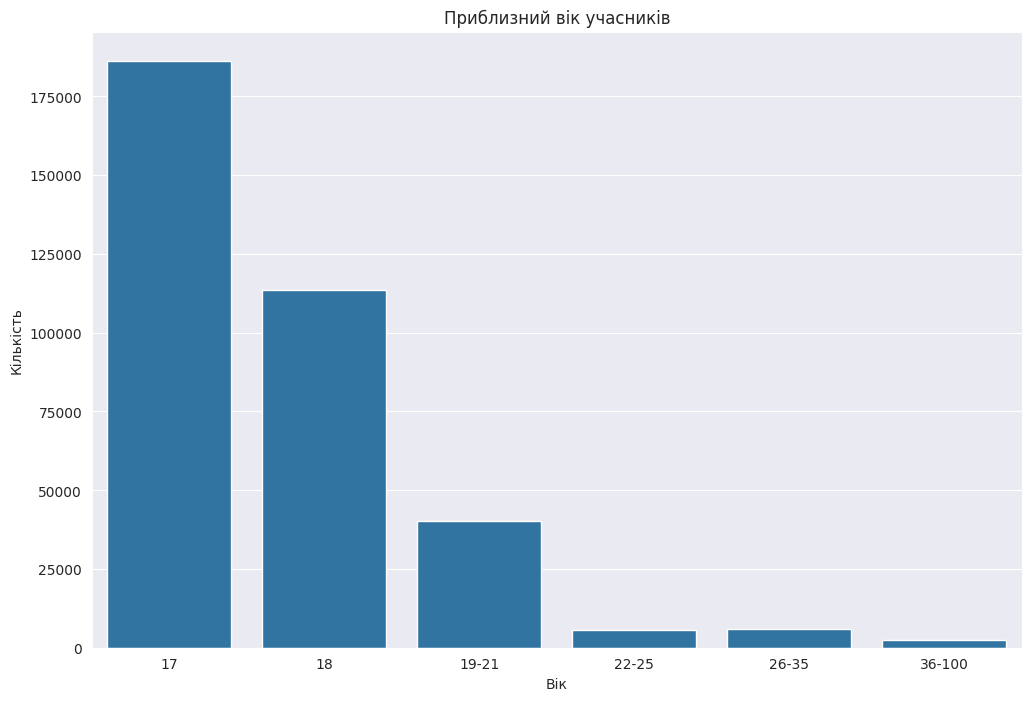

In [101]:
age_counts = age_bins.value_counts(sort=False)
axes = subplots(figsize=(12, 8))[1]
barplot(x=age_counts.index.map(make_age_label), y=age_counts, ax=axes, color=default_color)
axes.set_xlabel('Вік')
axes.set_ylabel('Кількість')
axes.set_title('Приблизний вік учасників');

In [94]:
sex_palette = {'чоловіча': '#1f77b4', 'жіноча': '#ff7f0e'}

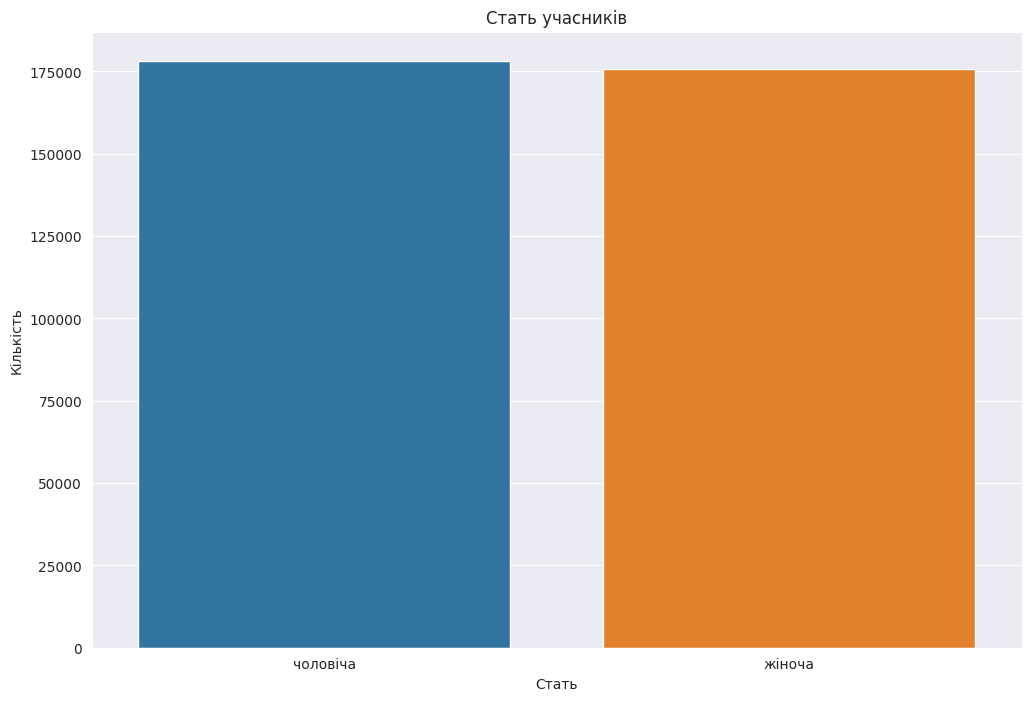

In [95]:
sex_counts = participants['SEXTYPENAME'].value_counts()
axes = subplots(figsize=(12, 8))[1]
barplot(x=sex_counts.index, y=sex_counts, ax=axes, palette=sex_palette)
axes.set_xlabel('Стать')
axes.set_ylabel('Кількість')
axes.set_title('Стать учасників');

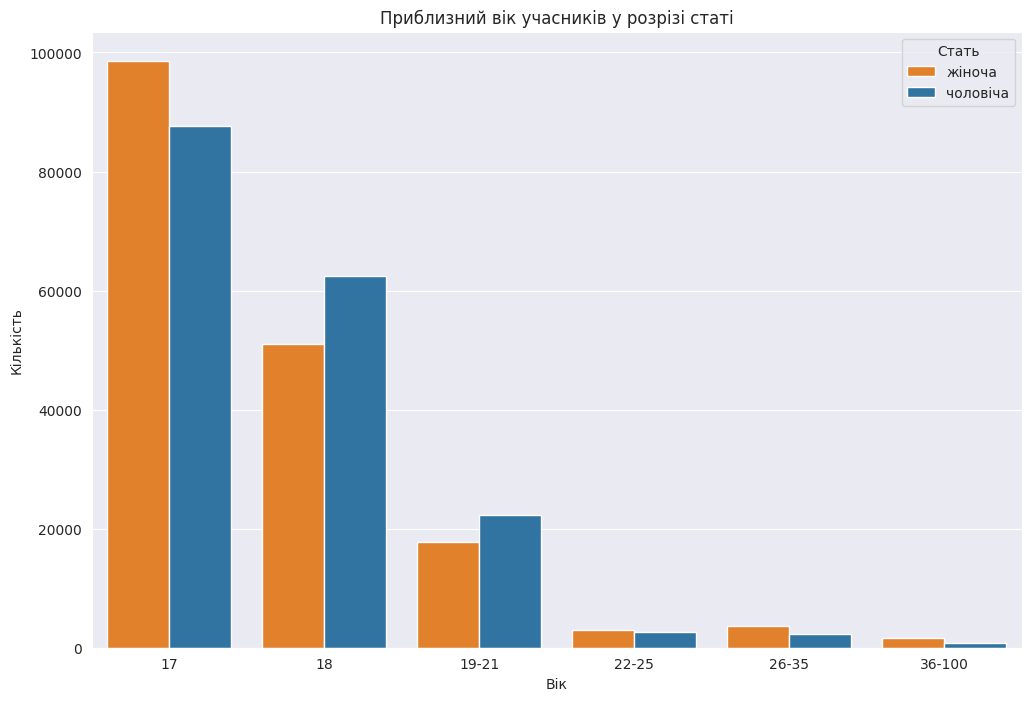

In [96]:
age_sex_counts = (
    concat([participants['SEXTYPENAME'], age_bins], axis=1)
    .groupby(['Age', 'SEXTYPENAME'])
    .size()
)
axes = subplots(figsize=(12, 8))[1]
x = age_sex_counts.index.get_level_values(0).map(make_age_label)
y = age_sex_counts.values
hue = age_sex_counts.index.get_level_values(1).rename('Стать')
barplot(x=x, y=y, hue=hue, ax=axes, palette=sex_palette)
axes.set_xlabel('Вік')
axes.set_ylabel('Кількість')
axes.set_title('Приблизний вік учасників у розрізі статі');

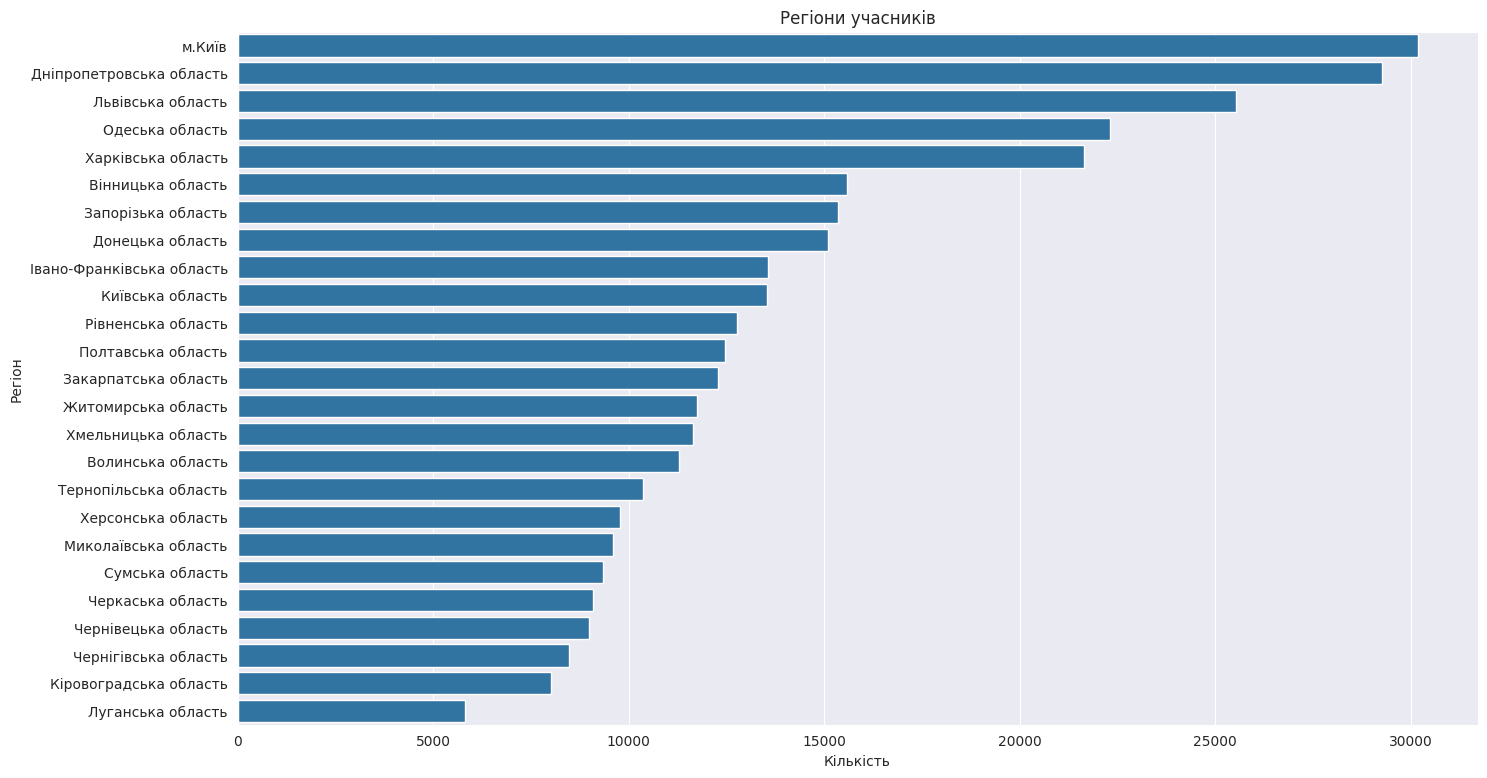

In [99]:
region_counts = participants['REGNAME'].value_counts()
axes = subplots(figsize=(16, 9))[1]
barplot(x=region_counts, y=region_counts.index, ax=axes, color=default_color)
axes.set_xlabel('Кількість')
axes.set_ylabel('Регіон')
axes.set_title('Регіони учасників');

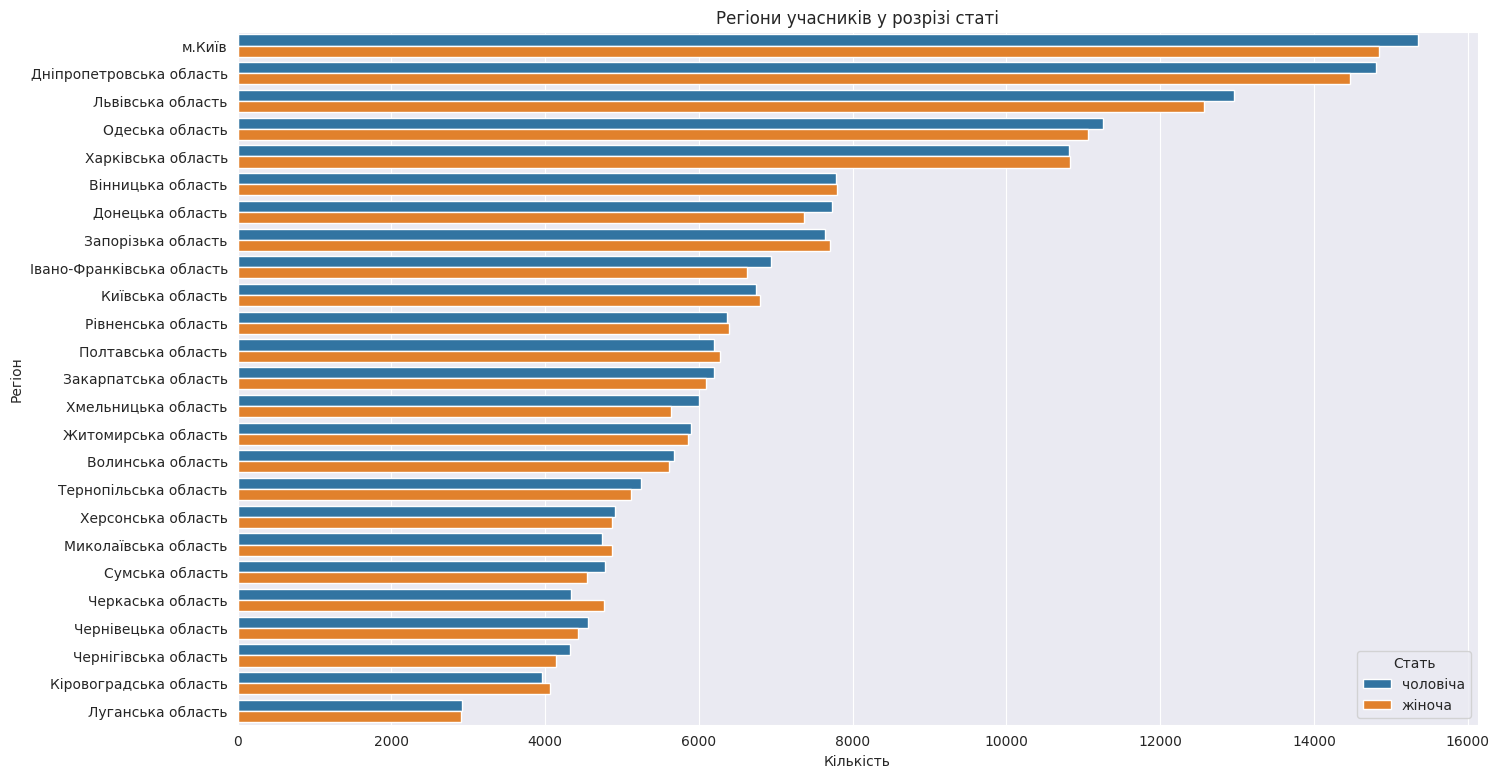

In [97]:
region_sex_counts = participants.groupby(['REGNAME', 'SEXTYPENAME']).size().sort_values(ascending=False)
axes = subplots(figsize=(16, 9))[1]
x = region_sex_counts.values
y = region_sex_counts.index.get_level_values(0)
hue = region_sex_counts.index.get_level_values(1).rename('Стать')
barplot(x=x, y=y, hue=hue, ax=axes, palette=sex_palette)
axes.set_xlabel('Кількість')
axes.set_ylabel('Регіон')
axes.set_title('Регіони учасників у розрізі статі');